In [1]:
import pandas as pd


In [2]:
# Read the Excel file into a DataFrame
df = pd.read_excel("sales.xlsx")

# Display the first rows to verify
print(df.head())


    OrderNumber  OrderDate  Ship Date  Customer Name Index      Channel  \
0   SO - 000225 2017-01-01 2017-01-13                   28    Wholesale   
1  SO - 0003378 2017-01-01 2017-01-06                    7  Distributor   
2  SO - 0003901 2017-01-01 2017-01-05                   12    Wholesale   
3  SO - 0005126 2017-01-01 2017-01-17                    5    Wholesale   
4  SO - 0005614 2017-01-01 2017-01-07                   27       Export   

  Currency Code Warehouse Code  Delivery Region Index  \
0           NZD         AXW291                     71   
1           NZD         AXW291                     54   
2           NZD         AXW291                     58   
3           USD         AXW291                     29   
4           NZD         AXW291                     31   

   Product Description Index  Order Quantity  Unit Selling Price  Unit Cost  
0                         11               6              2499.1   1824.343  
1                          7              11      

In [3]:
#Sanity check
print(df.columns)  # Show column names
print(df.info())   # Show data types and missing values


Index(['OrderNumber', 'OrderDate', 'Ship Date', 'Customer Name Index',
       'Channel', 'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Selling Price',
       'Unit Cost'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                7991 non-null   object        
 1   OrderDate                  7991 non-null   datetime64[ns]
 2   Ship Date                  7991 non-null   datetime64[ns]
 3   Customer Name Index        7991 non-null   int64         
 4   Channel                    7991 non-null   object        
 5   Currency Code              7991 non-null   object        
 6   Warehouse Code             7991 non-null   object        
 7   Delivery Region Index      7991 non-null   int64     

In [4]:
#Check duplicates
# Check if any rows are exact duplicates
duplicates_count = df.duplicated().sum()
print(f"Number of exact duplicate rows: {duplicates_count}")

# Check if OrderNumber itself has duplicates
order_number_dupes = df['OrderNumber'].duplicated().sum()
print(f"Number of duplicate OrderNumbers: {order_number_dupes}")


Number of exact duplicate rows: 0
Number of duplicate OrderNumbers: 0


In [5]:
# Negative or zero quantities
invalid_quantities = df[df['Order Quantity'] <= 0]
print(f"Orders with zero or negative quantity: {len(invalid_quantities)}")

# Selling price less than cost
loss_sales = df[df['Unit Selling Price'] < df['Unit Cost']]
print(f"Orders with selling price less than cost: {len(loss_sales)}")

# Ship date earlier than order date
date_issues = df[df['Ship Date'] < df['OrderDate']]
print(f"Orders with ship date before order date: {len(date_issues)}")


Orders with zero or negative quantity: 0
Orders with selling price less than cost: 0
Orders with ship date before order date: 0


In [6]:
#Checking for currency
print("Unique currencies:", df['Currency Code'].unique())


Unique currencies: ['NZD' 'USD' 'GBP' 'EUR' 'AUD']


In [8]:
#For good practice even though we found no duplicates or missing values
df = df.drop_duplicates()
df = df.dropna()  # or use fillna() if you prefer imputing missing values


In [ ]:
#We run the calculations
df['Total Sales'] = df['Order Quantity'] * df['Unit Selling Price']
df['Total Cost'] = df['Order Quantity'] * df['Unit Cost']
df['Profit'] = df['Total Sales'] - df['Total Cost']
df['Margin (%)'] = (df['Profit'] / df['Total Sales']) * 100


In [10]:
#Saving the confirmed clean data
df.to_excel("sales_cleaned.xlsx", index=False)


In [11]:
#getting min and max date
min_date = df['OrderDate'].min()
max_date = df['OrderDate'].max()

print(min_date, max_date)


2017-01-01 00:00:00 2019-12-12 00:00:00


In [12]:
#creating continus data range
date_range = pd.date_range(start=min_date, end=max_date, freq='D')


In [13]:
#building the tables
date_df = pd.DataFrame({'Date': date_range})
date_df['Year'] = date_df['Date'].dt.year
date_df['Quarter'] = date_df['Date'].dt.quarter
date_df['Month'] = date_df['Date'].dt.month
date_df['Month Name'] = date_df['Date'].dt.strftime('%B')
date_df['Day'] = date_df['Date'].dt.day
date_df['Day of Week'] = date_df['Date'].dt.dayofweek
date_df['Day Name'] = date_df['Date'].dt.strftime('%A')


In [14]:
#verification
print(date_df['Date'].is_unique)        # Must be True
print(date_df['Date'].isnull().sum())   # Must be 0
print(date_df.head())


True
0
        Date  Year  Quarter  Month Month Name  Day  Day of Week   Day Name
0 2017-01-01  2017        1      1    January    1            6     Sunday
1 2017-01-02  2017        1      1    January    2            0     Monday
2 2017-01-03  2017        1      1    January    3            1    Tuesday
3 2017-01-04  2017        1      1    January    4            2  Wednesday
4 2017-01-05  2017        1      1    January    5            3   Thursday


In [15]:
#Saving it for later use if needed
date_df.to_excel("date_table.xlsx", index=False)


In [16]:
#Preparing data
df['Year'] = df['OrderDate'].dt.year


In [17]:
#Total sales
total_sales = df['Total Sales'].sum()


In [18]:
#Total sales previous year
prev_year = df['Year'].max() - 1
total_sales_py = df[df['Year'] == prev_year]['Total Sales'].sum()


In [19]:
#Total sales between years
total_sales_py_var = total_sales - total_sales_py


In [20]:
#Total sales per year percentage change
total_sales_py_var_pct = (total_sales_py_var / total_sales) if total_sales != 0 else 0


In [21]:
#Total order quantity
total_order_quantity = df['Order Quantity'].sum()


In [22]:
#Total profit
total_profit = df['Profit'].sum()


In [23]:
#Total profit per year
total_profit_py = df[df['Year'] == prev_year]['Profit'].sum()


In [24]:
total_profit_py_var = total_profit - total_profit_py


In [25]:
total_profit_py_var_pct = (total_profit_py_var / total_profit) if total_profit != 0 else 0


In [ ]:
#for easy access (lacks the rest fo the data)
measures = {
    'Total Sales': total_sales,
    'Total Sales PY': total_sales_py,
    'Total Sales/PY Var': total_sales_py_var,
    'Total Sales/PY Var %': total_sales_py_var_pct,
    'Total Order Quantity': total_order_quantity,
    'Total Profit': total_profit,
    'Total Profit PY': total_profit_py,
    'Total Profit/PY Var': total_profit_py_var,
    'Total Profit/PY Var %': total_profit_py_var_pct
}

print(measures)


{'Total Sales': np.float64(154573140.60000002), 'Total Sales PY': np.float64(53463661.7), 'Total Sales/PY Var': np.float64(101109478.90000002), 'Total Sales/PY Var %': np.float64(0.6541206221697226), 'Total Order Quantity': np.int64(67579), 'Total Profit': np.float64(57789142.907), 'Total Profit PY': np.float64(19789189.546), 'Total Profit/PY Var': np.float64(37999953.361), 'Total Profit/PY Var %': np.float64(0.6575621552676993)}


In [27]:
#Profit margins
profit_margin_pct = (total_profit / total_sales) if total_sales != 0 else 0


In [28]:
#Total costs
total_cost = df['Total Cost'].sum()


In [29]:
#Total order quantity previous year
total_order_quantity_py = df[df['Year'] == prev_year]['Order Quantity'].sum()


In [30]:
#Total order differnece
total_order_quantity_py_var = total_order_quantity - total_order_quantity_py


In [31]:
total_order_quantity_py_var_pct = (total_order_quantity_py_var / total_order_quantity) if total_order_quantity != 0 else 0


In [32]:
#Final measure
measures.update({
    'Profit Margin %': profit_margin_pct,
    'Total Cost': total_cost,
    'Total Order Quantity PY': total_order_quantity_py,
    'Total Order Quantity PY Var': total_order_quantity_py_var,
    'Total Order Quantity PY Var %': total_order_quantity_py_var_pct,
})


In [33]:
for k, v in measures.items():
    print(f"{k}: {v}")


Total Sales: 154573140.60000002
Total Sales PY: 53463661.7
Total Sales/PY Var: 101109478.90000002
Total Sales/PY Var %: 0.6541206221697226
Total Order Quantity: 67579
Total Profit: 57789142.907
Total Profit PY: 19789189.546
Total Profit/PY Var: 37999953.361
Total Profit/PY Var %: 0.6575621552676993
Profit Margin %: 0.3738627725533836
Total Cost: 96783997.693
Total Order Quantity PY: 23153
Total Order Quantity PY Var: 44426
Total Order Quantity PY Var %: 0.6573935690081238


In [34]:
#Import needed setup (i forgot to do it in the beginning)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [35]:
df['Year'] = df['OrderDate'].dt.year


Sales by product & comparison with last year

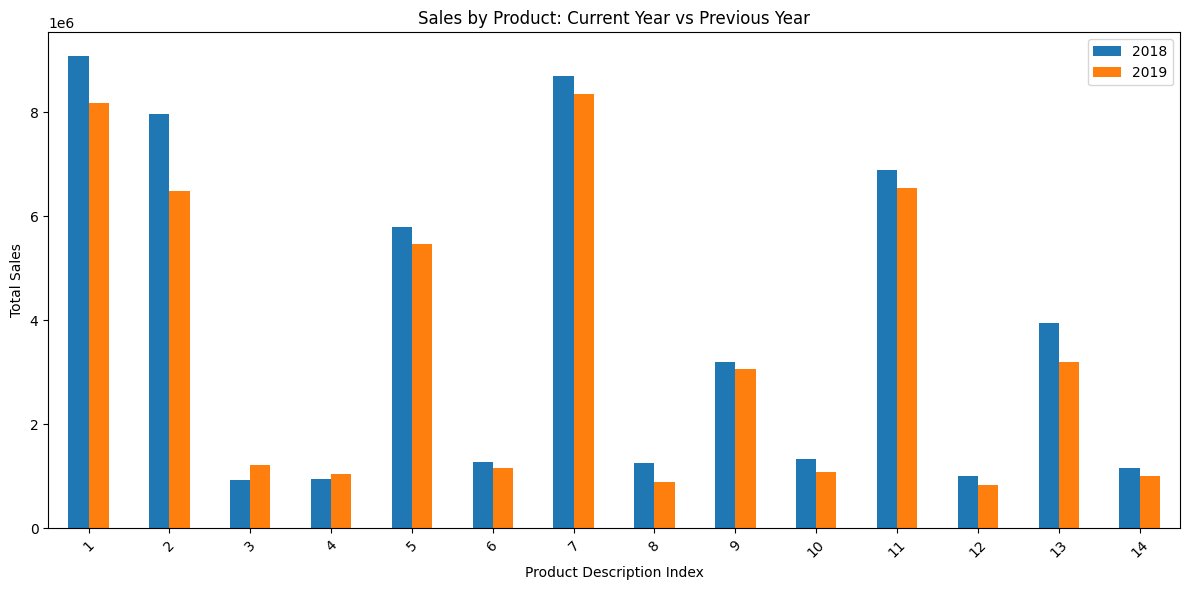

In [36]:


# Current and previous years
current_year = df['Year'].max()
prev_year = current_year - 1

# Group sales by product and year
sales_product = df.groupby(['Product Description Index', 'Year'])['Total Sales'].sum().unstack(fill_value=0)

# Plot
sales_product_plot = sales_product.loc[:, [prev_year, current_year]]
sales_product_plot.plot(kind='bar', figsize=(12,6))
plt.title("Sales by Product: Current Year vs Previous Year")
plt.xlabel("Product Description Index")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend([f"{prev_year}", f"{current_year}"])
plt.tight_layout()
plt.show()


Sales by month & comparison with last year

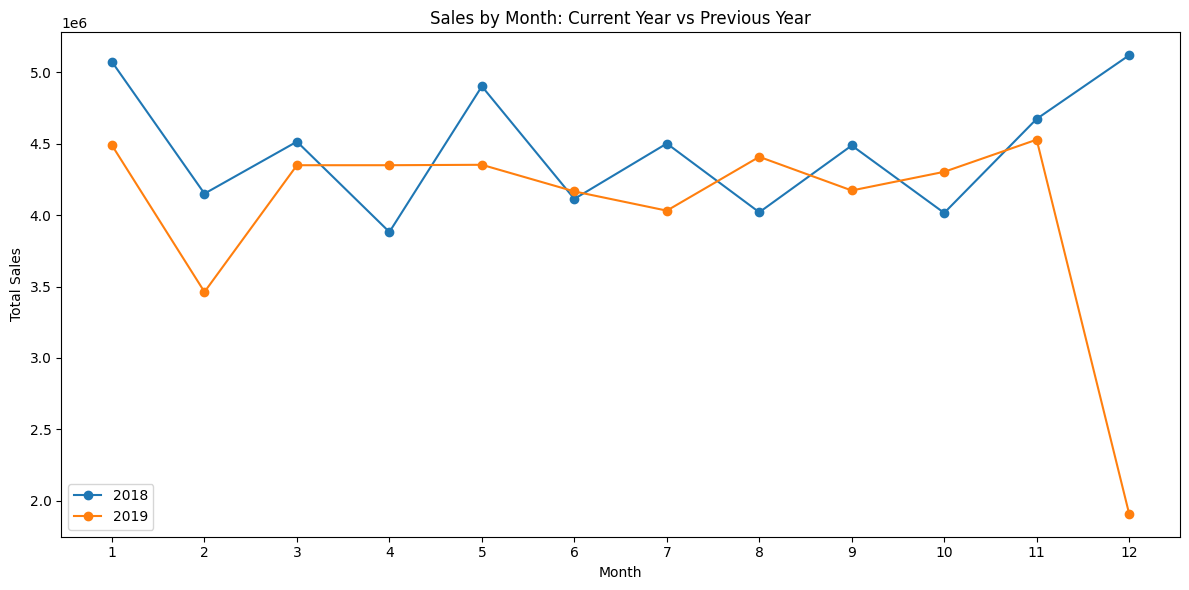

In [37]:
df['Month'] = df['OrderDate'].dt.month

# Aggregate sales by year and month
sales_month = df.groupby(['Year', 'Month'])['Total Sales'].sum().unstack(level=0).fillna(0)

# Plot
sales_month[[prev_year, current_year]].plot(kind='line', marker='o', figsize=(12,6))
plt.title("Sales by Month: Current Year vs Previous Year")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1,13))
plt.legend([f"{prev_year}", f"{current_year}"])
plt.tight_layout()
plt.show()


Top 5 cities by sales


C:\Users\Shaheda\AppData\Local\Temp\ipykernel_1296\3826574867.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_cities.values, y=top5_cities.index, palette='viridis')


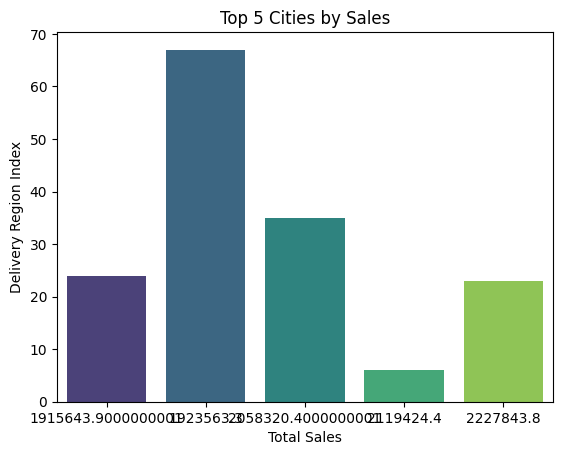

In [38]:
top5_cities = df.groupby('Delivery Region Index')['Total Sales'].sum().nlargest(5)

sns.barplot(x=top5_cities.values, y=top5_cities.index, palette='viridis')
plt.title("Top 5 Cities by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Delivery Region Index")
plt.show()


Compare profit by channel with last year

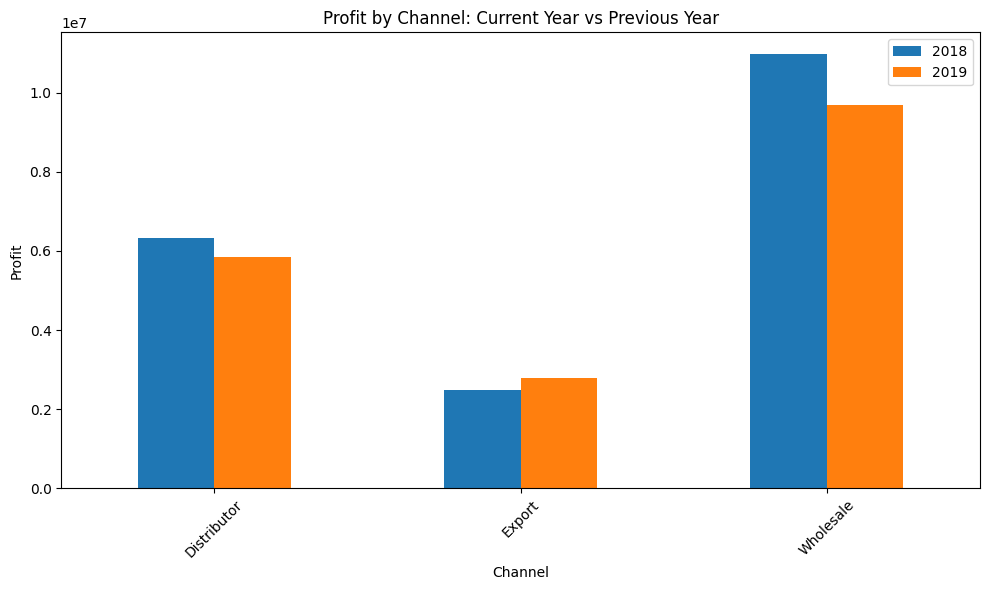

In [39]:
profit_channel = df.groupby(['Channel', 'Year'])['Profit'].sum().unstack(fill_value=0)
profit_channel_plot = profit_channel.loc[:, [prev_year, current_year]]

profit_channel_plot.plot(kind='bar', figsize=(10,6))
plt.title("Profit by Channel: Current Year vs Previous Year")
plt.xlabel("Channel")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.legend([f"{prev_year}", f"{current_year}"])
plt.tight_layout()
plt.show()


Top 5 customers by sales & comparison with last year

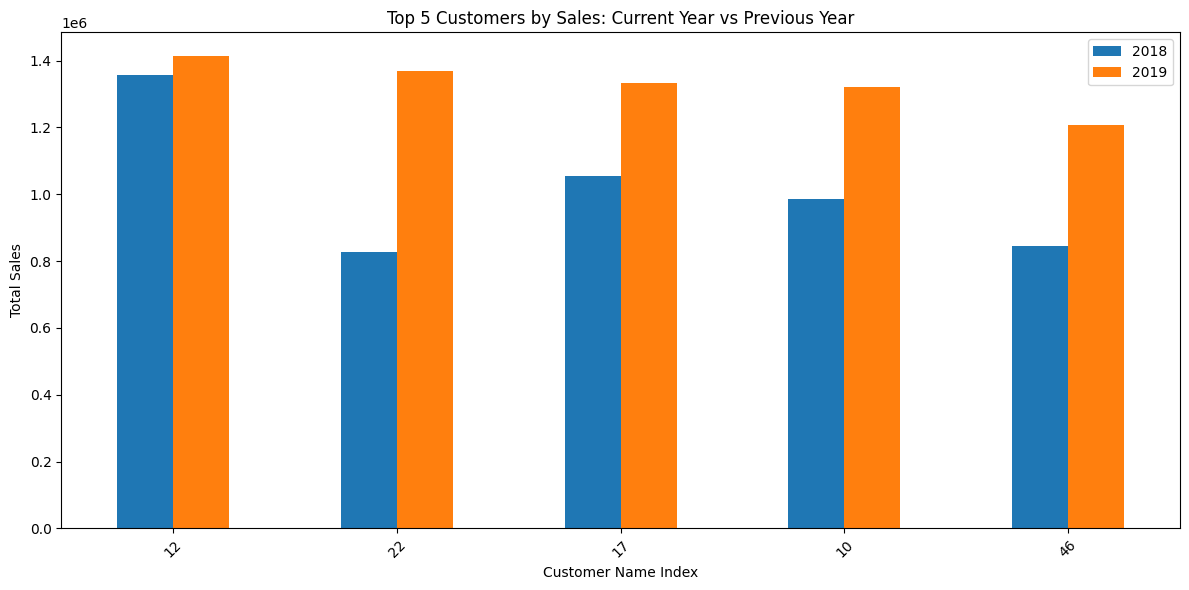

In [40]:
sales_customer = df.groupby(['Customer Name Index', 'Year'])['Total Sales'].sum().unstack(fill_value=0)

top5_customers = sales_customer[current_year].nlargest(5).index

sales_customer.loc[top5_customers, [prev_year, current_year]].plot(kind='bar', figsize=(12,6))
plt.title("Top 5 Customers by Sales: Current Year vs Previous Year")
plt.xlabel("Customer Name Index")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend([f"{prev_year}", f"{current_year}"])
plt.tight_layout()
plt.show()


Last 5 customers by sales & comparison with last year

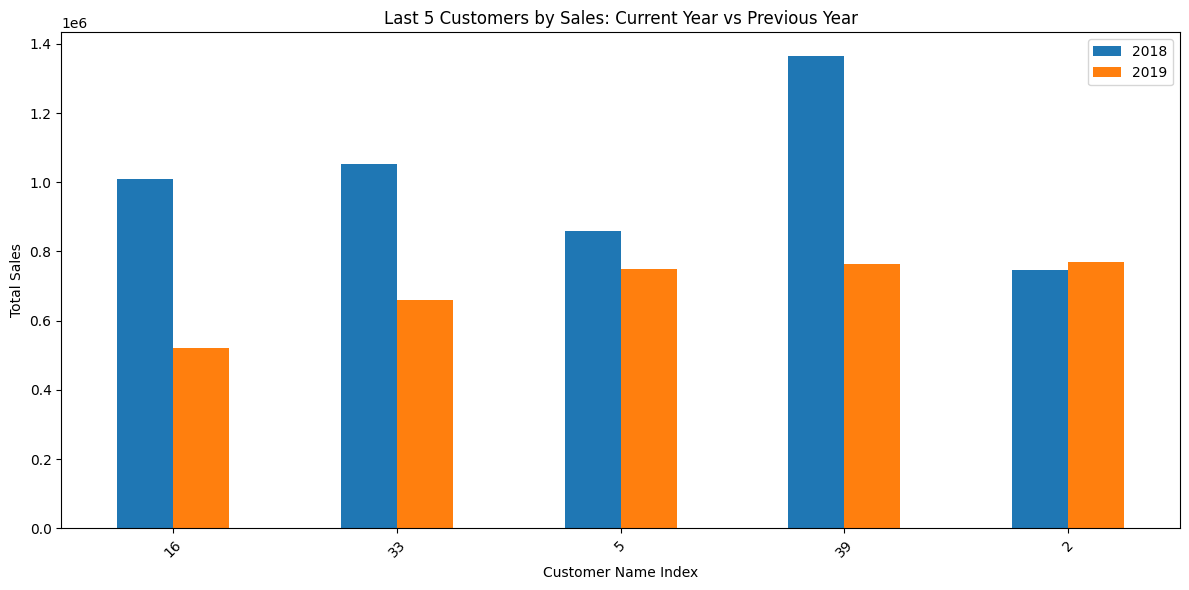

In [41]:
last5_customers = sales_customer[current_year].nsmallest(5).index

sales_customer.loc[last5_customers, [prev_year, current_year]].plot(kind='bar', figsize=(12,6))
plt.title("Last 5 Customers by Sales: Current Year vs Previous Year")
plt.xlabel("Customer Name Index")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend([f"{prev_year}", f"{current_year}"])
plt.tight_layout()
plt.show()


Create heatmaps or geographical-style maps for sales, profit, margin, and products sold

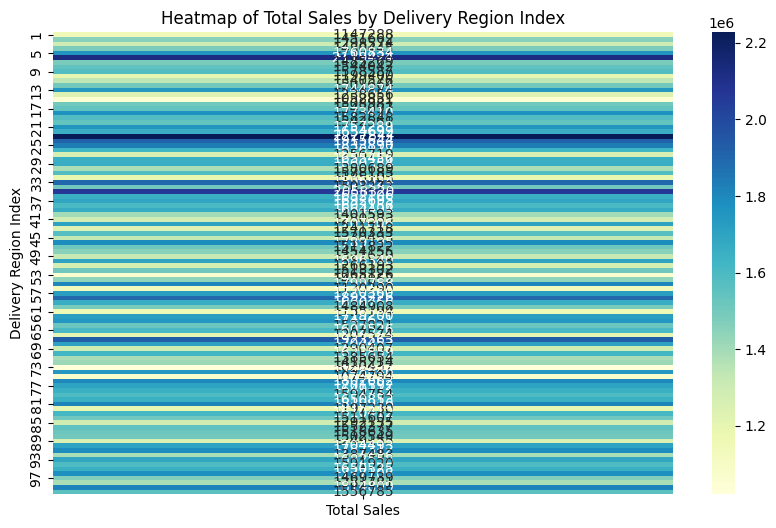

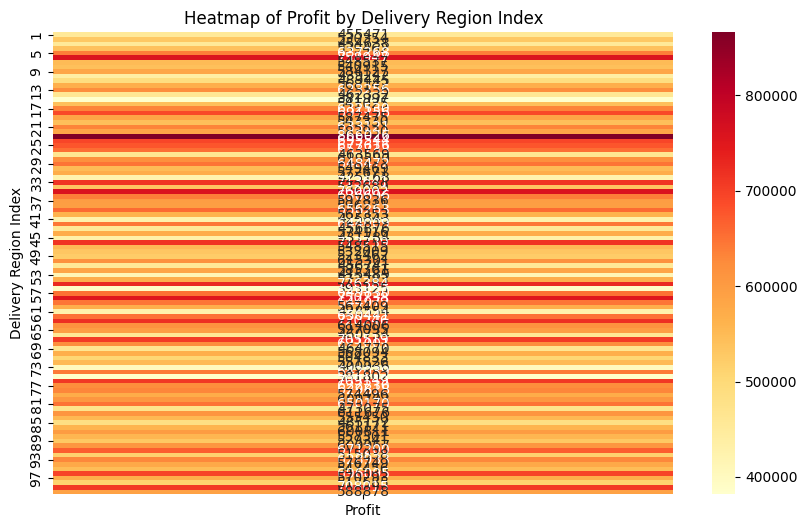

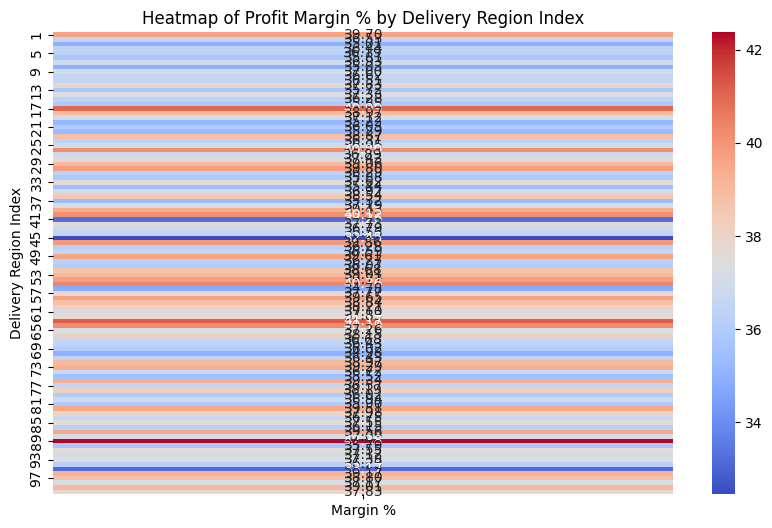

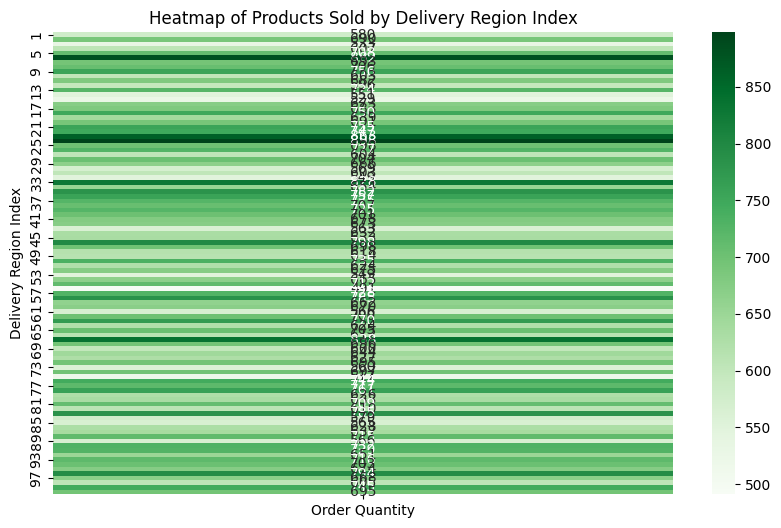

In [42]:
import numpy as np

region_sales = df.groupby('Delivery Region Index').agg({
    'Total Sales': 'sum',
    'Profit': 'sum',
    'Order Quantity': 'sum',
})

# Calculate margin %
region_sales['Margin %'] = (region_sales['Profit'] / region_sales['Total Sales']) * 100

# Heatmap for Total Sales by Delivery Region Index
plt.figure(figsize=(10,6))
sns.heatmap(region_sales[['Total Sales']].sort_index(), annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap of Total Sales by Delivery Region Index")
plt.show()

# Heatmap for Profit
plt.figure(figsize=(10,6))
sns.heatmap(region_sales[['Profit']].sort_index(), annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Heatmap of Profit by Delivery Region Index")
plt.show()

# Heatmap for Margin %
plt.figure(figsize=(10,6))
sns.heatmap(region_sales[['Margin %']].sort_index(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of Profit Margin % by Delivery Region Index")
plt.show()

# Heatmap for Products Sold (Order Quantity)
plt.figure(figsize=(10,6))
sns.heatmap(region_sales[['Order Quantity']].sort_index(), annot=True, fmt=".0f", cmap="Greens")
plt.title("Heatmap of Products Sold by Delivery Region Index")
plt.show()


Exercsie done, and the heatmaps are not needed but it was suggested to add it.